In [118]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
from cvxpy import *
from sklearn.utils import shuffle


style.use('ggplot')


class SVM():
    def __init__(self, data):
        self.data = data.copy()
        self.normalized_data = normalize_df(data)
     
    def fit(self):
        data = self.normalized_data
        X = np.array(data.drop(['class'], 1)).astype(np.float)
        y = np.array(data['class']).astype(np.float)
        self.w, self.b = self._fit(X, y)
                        
    def cross_validate(self, k=10):
        self.split_data = split_data(self.data, k)
        n = len(self.split_data)
        results = []
        tests = []
        for i in range(n):
            test = self.split_data[i]
            train = [df for num, df in enumerate(self.split_data) if not num == i]
            train = pd.concat(train)
            test_X = normalize_01(np.array(test.drop(['class'], 1)).astype(np.float))
            test_y = np.array(test['class']).astype(np.float)
            train_X = normalize_01(np.array(train.drop(['class'], 1)).astype(np.float))
            train_y = np.array(train['class']).astype(np.float)
            w, b = self._fit(train_X, train_y)
            accuracy = self.test(test_X, test_y, w, b)
            results.append((w, b, accuracy))
            tests.append(accuracy)
        self.results = results
        self.accuracy_test = np.array(tests)
        self.accuracy = np.mean(self.accuracy_test)
           
    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)
    
    def _predict(self, X, w, b):
        return np.sign(np.dot(X, w) + b)
    
    def test(self, X, y, w, b):
        all_instances = 0
        correct_instances = 0
        for index, instance in enumerate(X):
            all_instances += 1
            if self._predict(instance, w, b) == y[index]:
                correct_instances += 1
        accuracy = correct_instances/all_instances
        return accuracy
    
    
    def visualize(self):
        if len(self.data.columns) != 3:
            return 'Number of attribute dimensions is not 2'
        self.fig = plt.figure()
        self.ax = self.fig.add_subplot(1,1,1)
        first_class = df.loc[df['class'] == 1]
        second_class = df.loc[df['class'] == -1]
        fst_att, snd_att, _ = first_class.columns
        self.ax.scatter(first_class[fst_att], first_class[snd_att], color = 'red')
        self.ax.scatter(second_class[fst_att], second_class[snd_att], color = 'blue')
        
        t = np.arange(-0.2, 1.0, 0.01)
        s = - clf.w[0]/clf.w[1] * t - clf.b/clf.w[1]

        s_plus = - clf.w[0]/clf.w[1] * t - (clf.b - 1)/clf.w[1]
        s_minus = - clf.w[0]/clf.w[1] * t - (clf.b + 1)/clf.w[1]
        
        self.ax.plot(t, s, 'black')
        self.ax.plot(t, s_plus, 'r--')
        self.ax.plot(t, s_minus, 'b--')
        
        plt.show()
        
    def _fit(self, X, y, C=5):
        
        # train to get w and b for hyperplane
        # solving optimizational problem for min ||w|| + C Sum(e_i)
        # subject to y_i (w^t x_i + b) >= 1 - e_i and e_i >= 0 for i = 1, ... , len data[0]

        n = len(X)
        m = len(X[0])

        w = Variable(m)
        b = Variable(1)
        e = Variable(n)


        obj = Minimize(norm(w) + C * sum_entries(e))

        constraints = [e >= 0]

        for i in range(n):
            constraints.append(1 - e[i]- y[i] * (w.T * X[i] + b) <= 0)

        prob = Problem(obj, constraints)
        prob.solve()

        w = np.squeeze(np.asarray(w.T.value))
        b = b.value        
        return (w, b)
        
    

def normalize_df(df):
    df[df.columns.difference(['class'])] = df[df.columns.difference(['class'])].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
    return df    
    
def normalize_01(X):
    X_normed = (X - X.min(0)) / X.ptp(0)
    return X_normed
    
def split_data(data, k=10):
    '''
    :param data:
    :param k:
    :return:
    '''
    data = shuffle(data)
    data.reset_index(drop=True,inplace=True)
    split_data = partition(data, k)
    return split_data
        
def partition(lst, n):
    '''
    :param lst: array of elemnts
    :param n: number of partitions
    :return: array partitioned into n arrays
    '''
    division = len(lst) / n
    return [lst[round(division * i):round(division * (i + 1))] for i in range(n)]



# df = pd.read_csv('breast-cancer-wisconsin.data.txt')
# df.replace('?', -99, inplace=True)
# df.drop(['id'], 1, inplace=True)
# df[['bare_nuclei']] = df[['bare_nuclei']].astype(float)

# df.loc[df['class'] == 2, 'class'] = 1
# df.loc[df['class'] == 4, 'class'] = -1


# X = df.drop(['class'], 1)
# y = df['class']

# X = np.array(X).astype(np.float)


# clf = SVM(df)

# clf.cross_validate()

#################################

df = pd.read_csv('bezdekIris.txt', sep=",", header=None)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'clas' ]

df = df[df.clas != 'Iris-versicolor']
df = df.rename(columns={'clas': 'class',})


df.replace({'Iris-setosa': 1, 'Iris-virginica': -1,}, inplace=True)
df.reset_index()


df.drop(['petal_length', 'petal_width'], 1, inplace=True)

# X = df.drop(['class'], 1)
# y = df['class']

# X = np.array(X).astype(np.float)
# y = np.array(y).astype(np.float)


clf = SVM(df)

clf.cross_validate()


###################################

# df = pd.read_csv('bezdekIris.txt', sep=",", header=None)
# df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'clas' ]

# df = df[df.clas != 'Iris-setosa']
# df = df.rename(columns={'clas': 'class',})


# df.replace({'Iris-versicolor': 1, 'Iris-virginica': -1,}, inplace=True)
# df.reset_index()


# df.drop(['petal_length', 'petal_width'], 1, inplace=True)

# X = df.drop(['class'], 1)
# y = df['class']

# X = np.array(X).astype(np.float)
# y = np.array(y).astype(np.float)


# clf = SVM(df)

# clf.cross_validate()

In [119]:
clf.fit()

In [120]:
clf.w

array([-4.8 , -1.44])

In [121]:
clf.b

2.9199999999237014

In [122]:
df[:10]

,sepal_length,sepal_width,class
50,0.700000,0.666667,1
51,0.500000,0.666667,1
52,0.666667,0.611111,1
53,0.200000,0.166667,1
54,0.533333,0.444444,1
55,0.266667,0.444444,1
56,0.466667,0.722222,1
57,0.000000,0.222222,1
58,0.566667,0.500000,1
59,0.100000,0.388889,1


In [123]:
clf.accuracy

0.67000000000000015

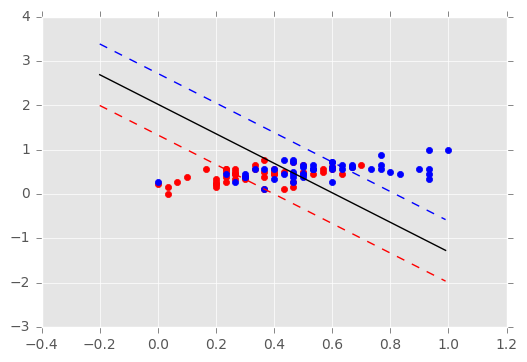

In [124]:
clf.visualize()

In [125]:
clf.results

[(array([-4.18604693, -2.09302312]), 3.046511797385048, 0.5),
 (array([-4.8 , -1.44]), 2.9199999995310915, 0.8),
 (array([-4.8 , -1.44]), 2.9200000000935717, 0.7),
 (array([-5.00000002, -1.50000001]), 3.0000000068328014, 0.7),
 (array([-5.21739125, -1.39130441]), 2.9130434779163572, 0.6),
 (array([ -5.45454545e+00,  -3.48079176e-10]), 2.4545454545585215, 0.6),
 (array([-3.87096775, -1.74193549]), 2.612903227281997, 0.9),
 (array([-5.09090909,  0.65454546]), 2.0909090896898381, 0.8),
 (array([-5.00000003, -1.49999984]), 2.9999999362856684, 0.4),
 (array([-4.8 , -1.44]), 2.9199999995679002, 0.7)]

In [113]:
df = pd.read_csv('breast-cancer-wisconsin.data.txt')
df.replace('?', -99, inplace=True)
df.drop(['id'], 1, inplace=True)
df[['bare_nuclei']] = df[['bare_nuclei']].astype(float)

df.loc[df['class'] == 2, 'class'] = 1
df.loc[df['class'] == 4, 'class'] = -1


X = df.drop(['class'], 1)
y = df['class']

In [114]:
df[:10]

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,1,1,1,2,1.0,3,1,1,1
1,5,4,4,5,7,10.0,3,2,1,1
2,3,1,1,1,2,2.0,3,1,1,1
3,6,8,8,1,3,4.0,3,7,1,1
4,4,1,1,3,2,1.0,3,1,1,1
5,8,10,10,8,7,10.0,9,7,1,-1
6,1,1,1,1,2,10.0,3,1,1,1
7,2,1,2,1,2,1.0,3,1,1,1
8,2,1,1,1,2,1.0,1,1,5,1
9,4,2,1,1,2,1.0,2,1,1,1


In [115]:
clf.data[:10]

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,1,1,1,2,1.0,3,1,1,1
1,5,4,4,5,7,10.0,3,2,1,1
2,3,1,1,1,2,2.0,3,1,1,1
3,6,8,8,1,3,4.0,3,7,1,1
4,4,1,1,3,2,1.0,3,1,1,1
5,8,10,10,8,7,10.0,9,7,1,-1
6,1,1,1,1,2,10.0,3,1,1,1
7,2,1,2,1,2,1.0,3,1,1,1
8,2,1,1,1,2,1.0,1,1,5,1
9,4,2,1,1,2,1.0,2,1,1,1


In [127]:
clf.accuracy_test

array([ 0.5,  0.8,  0.7,  0.7,  0.6,  0.6,  0.9,  0.8,  0.4,  0.7])

In [126]:
clf.accuracy

0.67000000000000015